# RGB Image Encryption and Decryption

Encrypts and decrypts an RGB image using:
- **Confusion**: Shuffle pixel positions.
- **Diffusion**: Caesar cipher with key 50.
- **Decoding**: Reverse Caesar cipher and unshuffle pixels.

Each processing step is visualized.

## Step 1: Import Libraries

In [25]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## Step 2: Define Functions

In [26]:
def encrypt_image(image, key):
    height, width, _ = image.shape
    encrypted = np.zeros_like(image, dtype=np.uint8)
    perms = []
    
    # Confusion: 
    for c in range(3):
        np.random.seed(key + c)
        perm = np.random.permutation(height * width)
        encrypted[:, :, c] = image[:, :, c].flatten()[perm].reshape(height, width)
        perms.append(perm)
    
    # Diffusion: 
    encrypted = (encrypted.astype(np.int16) + key) % 256
    
    return encrypted.astype(np.uint8), perms

def decrypt_image(encrypted, key, perms):
    height, width, _ = encrypted.shape
    temp = np.zeros_like(encrypted, dtype=np.uint8)
    
    # Reverse Diffusion: 
    temp = (encrypted.astype(np.int16) - key) % 256
    
    # Reverse Confusion: 
    decrypted = np.zeros_like(temp, dtype=np.uint8)
    for c in range(3):
        inverse_perm = np.argsort(perms[c])
        decrypted[:, :, c] = temp[:, :, c].flatten()[inverse_perm].reshape(height, width)
    
    return decrypted.astype(np.uint8)

## Step 3: Load RGB Image

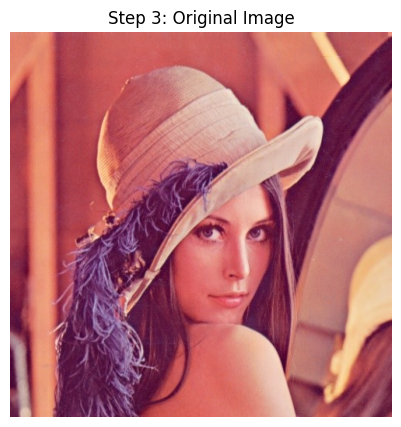

In [27]:
image_path = 'lena.png'  
try:
    image = Image.open(image_path).convert('RGB')
    image_array = np.array(image, dtype=np.uint8)
except FileNotFoundError:
    print(f'Error: Image not found at {image_path}')
    raise

# Visualize
plt.figure(figsize=(5, 5))
plt.imshow(image_array)
plt.title('Step 3: Original Image')
plt.axis('off')
plt.show()

## Step 4: Encryption (Confusion and Diffusion)

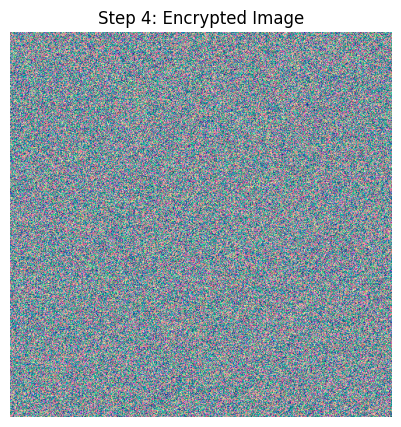

In [28]:
key = 50
encrypted_image, perms = encrypt_image(image_array, key)
Image.fromarray(encrypted_image).save('encrypted_image.png')

# Visualize
plt.figure(figsize=(5, 5))
plt.imshow(encrypted_image)
plt.title('Step 4: Encrypted Image')
plt.axis('off')
plt.show()

## Step 5: Decryption

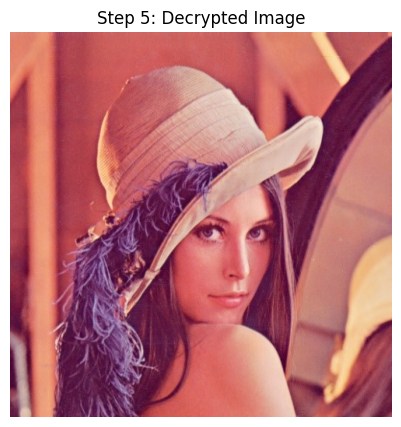

In [29]:
decrypted_image = decrypt_image(encrypted_image, key, perms)
Image.fromarray(decrypted_image).save('decrypted_image.png')

# Visualize
plt.figure(figsize=(5, 5))
plt.imshow(decrypted_image)
plt.title('Step 5: Decrypted Image')
plt.axis('off')
plt.show()

## Step 6: Final Results

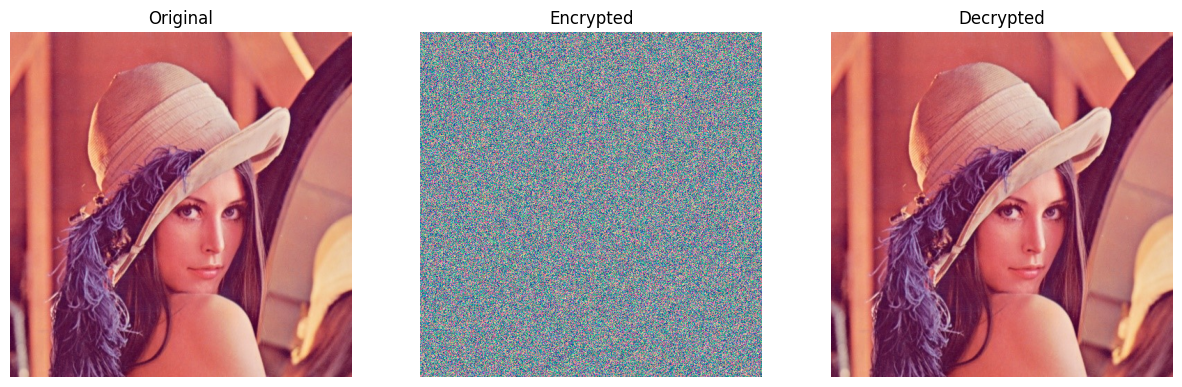

In [30]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_array)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(encrypted_image)
plt.title('Encrypted')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(decrypted_image)
plt.title('Decrypted')
plt.axis('off')

plt.savefig('image_comparison.png')
plt.show()